In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


df = pd.read_csv('data3.csv')
df.head()





,User ID,Friends,Messages Sent
0,user_1,"['user_16', 'user_20', 'user_7', 'user_8']",167
1,user_2,['user_26'],190
2,user_3,"['user_19', 'user_31', 'user_42', 'user_25', '...",133
3,user_4,"['user_46', 'user_45', 'user_43', 'user_6', 'u...",129
4,user_5,"['user_48', 'user_17', 'user_31', 'user_26', '...",121


In [ ]:

suspicious_nodes = []


for i, row in df.iterrows():
    user_id = row['User ID']


    friends = row['Friends']
    if isinstance(friends, (int, np.integer)):
        friends = [friends]
    elif isinstance(friends, str):
        friends = eval(friends)


    num_friends = len(friends)

    num_messages = row['Messages Sent']


    if num_friends < 3 and num_messages > 180:
        suspicious_nodes.append(user_id)

df['Num_Friends'] = df['Friends'].apply(lambda x: len(eval(x)) if isinstance(x, str) else len(x))
df.head()



,User ID,Friends,Messages Sent,Num_Friends
0,user_1,"['user_16', 'user_20', 'user_7', 'user_8']",167,4
1,user_2,['user_26'],190,1
2,user_3,"['user_19', 'user_31', 'user_42', 'user_25', '...",133,8
3,user_4,"['user_46', 'user_45', 'user_43', 'user_6', 'u...",129,7
4,user_5,"['user_48', 'user_17', 'user_31', 'user_26', '...",121,7


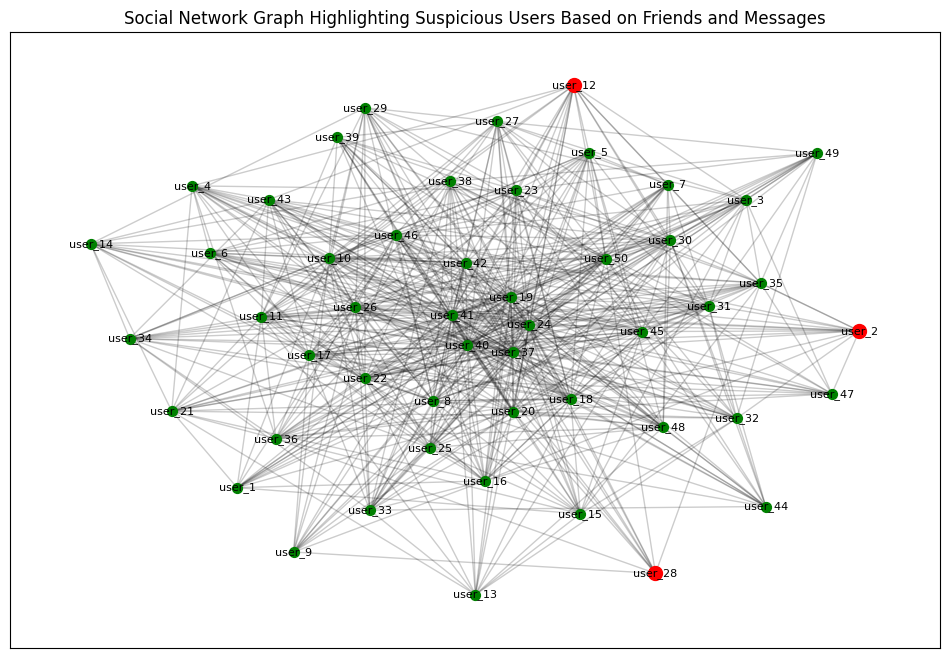

Suspicious Users Based on Friends and Messages:
 ['user_2', 'user_12', 'user_28']


In [ ]:

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='green', node_size=50)

nx.draw_networkx_nodes(G, pos, nodelist=suspicious_nodes, node_color='red', node_size=100)

nx.draw_networkx_edges(G, pos, alpha=0.2)

nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

plt.title("Social Network Graph Highlighting Suspicious Users Based on Friends and Messages")
plt.show()

print("Suspicious Users Based on Friends and Messages:\n", suspicious_nodes)
